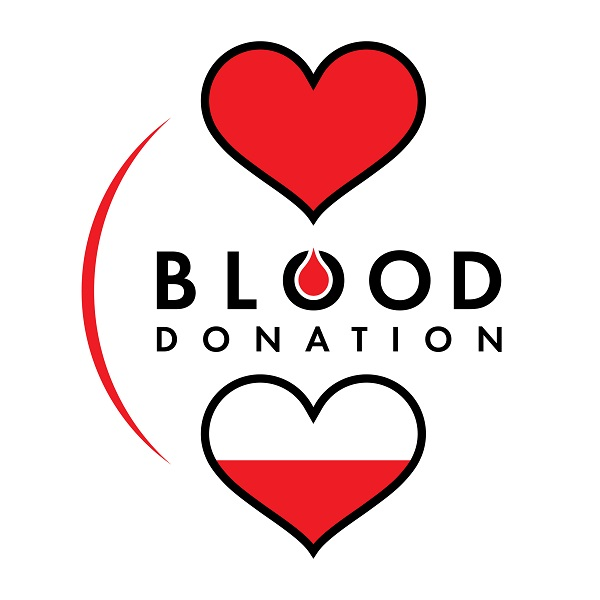

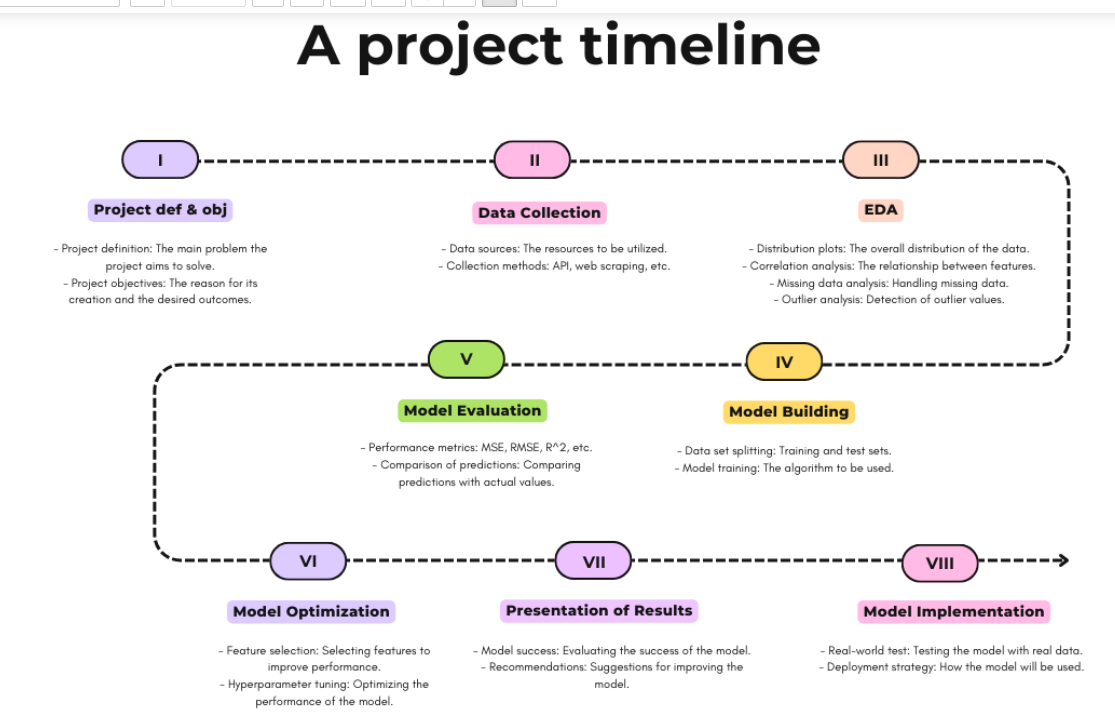

# INTRODUCTION

<p>Blood transfusion saves lives, from replacing lost blood during major surgery or serious injury to treating various diseases and blood disorders. Ensuring an adequate supply of blood when needed poses a significant challenge for healthcare professionals. ''.  According to <a href="https://www.webmd.com/a-to-z-guides/blood-transfusion-what-to-know#1">WebMD</a>'estimates, approximately 5 million Americans need blood transfusions each year.".</p>

<p>Our dataset has been obtained from the mobile blood donation vehicle in Taiwan.</p>

<p>The data is stored in datasets/transfusion.data and structured according to the RFMTC marketing model (a variation of RFM).

**RFM** is typically used for customer segmentation, analyzing customers based on when they last made a purchase **(Recency)**, how often they make purchases **(Frequency)**, and how much they spend **(Monetary)**. These metrics are often adapted for purposes such as customer lifetime value modeling, churn prediction, and customer segmentation.

However, in this context, these metrics have been repurposed for the social welfare issue of blood donation.

In this dataset:

**RFMTC components**

1. **Recency (R) - (months)**
    - This feature represents the amount of time that has passed since a donor's last donation. Typically, donors who have donated more recently are more likely to donate again.
  
2. **Frequency (F) - (times)**
    - This indicates how frequently a donor has donated blood. Individuals who donate blood at a higher frequency typically have a higher likelihood of donating again in the future.
  
3. **Monetary (M) - (c.c. blood)**
    - This feature represents the total amount of blood donated by a donor. Typically, donors who have donated a higher volume of blood are considered to be of higher value.

4. **Time (T) - (months)**
    - This indicates the amount of time that has passed since a donor's first donation. This feature can be used to understand how "loyal" a donor has been throughout their donation period.

5. **Churn (C) — "whether he/she donated blood in March 2007"**
    - This indicates whether a donor made a donation within a specific period (such as March 2007). In this example, churn represents the likelihood of a donor not making a donation during that period.
    
**Areas of application of RFMTC**

1. **Segmentation**: Donors can be segmented into different groups using these features. For example, donors with high "F" and low "R" values can be labeled as "Loyal Donors".

2. **Prediction**: The likelihood of future donations can be predicted using the current RFMTC values.

3. **Targeting**: Special campaigns or incentives can be used to target specific donor segments.

4. **Risk Analysis**: Donors with low frequency and high churn rates can be labeled as "At-Risk", and special strategies can be developed for these donors.

This modeling technique is highly useful for understanding donors' future behaviors and managing them more effectively.

It can be used to model the likelihood of donors donating blood in the future.

# Importing Libraries

In [1]:
import numpy as np
import pandas as pd

# Exploratory Data Analysis and Visualization

In [2]:
df = pd.read_csv('transfusion.data')
df

,Recency (months),Frequency (times),Monetary (c.c. blood),Time (months),whether he/she donated blood in March 2007
0,2,50,12500,98,1
1,0,13,3250,28,1
2,1,16,4000,35,1
3,2,20,5000,45,1
4,1,24,6000,77,0
...,...,...,...,...,...
743,23,2,500,38,0
744,21,2,500,52,0
745,23,3,750,62,0
746,39,1,250,39,0


## Change the column names if necessary

In [3]:
new_column_names = {'Recency (months)':'Recency','Frequency (times)':'Frequency',
                    'Monetary (c.c. blood)':'Monetary', 'Time (months)':'Time',
                    'whether he/she donated blood in March 2007':'Target'}
df.rename(columns=new_column_names, inplace=True)

In [4]:
df

,Recency,Frequency,Monetary,Time,Target
0,2,50,12500,98,1
1,0,13,3250,28,1
2,1,16,4000,35,1
3,2,20,5000,45,1
4,1,24,6000,77,0
...,...,...,...,...,...
743,23,2,500,38,0
744,21,2,500,52,0
745,23,3,750,62,0
746,39,1,250,39,0


## Get the first 5 lines/ entries

In [5]:
df.head()

,Recency,Frequency,Monetary,Time,Target
0,2,50,12500,98,1
1,0,13,3250,28,1
2,1,16,4000,35,1
3,2,20,5000,45,1
4,1,24,6000,77,0


## Look at the general information

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 748 entries, 0 to 747
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype
---  ------     --------------  -----
 0   Recency    748 non-null    int64
 1   Frequency  748 non-null    int64
 2   Monetary   748 non-null    int64
 3   Time       748 non-null    int64
 4   Target     748 non-null    int64
dtypes: int64(5)
memory usage: 29.3 KB


## Look at the shape

In [7]:
df.shape

(748, 5)

## Check for missing values

In [8]:
df.isnull()

,Recency,Frequency,Monetary,Time,Target
0,False,False,False,False,False
1,False,False,False,False,False
2,False,False,False,False,False
3,False,False,False,False,False
4,False,False,False,False,False
...,...,...,...,...,...
743,False,False,False,False,False
744,False,False,False,False,False
745,False,False,False,False,False
746,False,False,False,False,False


In [9]:
df.isnull().sum()

Recency      0
Frequency    0
Monetary     0
Time         0
Target       0
dtype: int64

In [10]:
df.isnull().sum().any()

False

## Check for duplicated values

In [11]:
df.duplicated()

0      False
1      False
2      False
3      False
4      False
       ...  
743    False
744    False
745    False
746    False
747    False
Length: 748, dtype: bool

In [7]:
df.duplicated().sum()

np.int64(215)

In [13]:
df[df.duplicated()]

,Recency,Frequency,Monetary,Time,Target
18,2,6,1500,15,1
20,2,3,750,4,1
23,2,6,1500,16,1
32,4,10,2500,28,1
43,2,5,1250,16,0
...,...,...,...,...,...
735,23,1,250,23,0
736,23,1,250,23,0
737,23,1,250,23,0
738,23,1,250,23,0


## Check the dtype

In [14]:
df.dtypes

Recency      int64
Frequency    int64
Monetary     int64
Time         int64
Target       int64
dtype: object

## Calculate the basic statistical values

In [15]:
df.describe()

,Recency,Frequency,Monetary,Time,Target
count,748.000000,748.000000,748.000000,748.000000,748.000000
mean,9.506684,5.514706,1378.676471,34.282086,0.237968
std,8.095396,5.839307,1459.826781,24.376714,0.426124
min,0.000000,1.000000,250.000000,2.000000,0.000000
25%,2.750000,2.000000,500.000000,16.000000,0.000000
50%,7.000000,4.000000,1000.000000,28.000000,0.000000
75%,14.000000,7.000000,1750.000000,50.000000,0.000000
max,74.000000,50.000000,12500.000000,98.000000,1.000000


## Check unique values

In [16]:
df.Recency.unique()

array([ 2,  0,  1,  4,  5,  9,  3, 12,  6, 11, 10, 13,  8, 14,  7, 16, 15,
       23, 21, 18, 22, 26, 35, 38, 40, 74, 20, 17, 25, 39, 72],
      dtype=int64)

In [17]:
df.Frequency.unique()

array([50, 13, 16, 20, 24,  4,  7, 12,  9, 46, 23,  3, 10,  6,  5, 14, 15,
       11,  8,  2, 19, 17,  1, 22, 18, 38, 43, 34, 44, 26, 41, 21, 33],
      dtype=int64)

In [18]:
df.Monetary.unique()

array([12500,  3250,  4000,  5000,  6000,  1000,  1750,  3000,  2250,
       11500,  5750,   750,  2500,  1500,  1250,  3500,  3750,  2750,
        2000,   500,  4750,  4250,   250,  5500,  4500,  9500, 10750,
        8500, 11000,  6500, 10250,  5250,  8250], dtype=int64)

## Calculate the average of 'Recency'

In [19]:
df.Recency.mean()

9.506684491978609

## Find the highest value in 'Frequency'

In [20]:
df.Frequency.max()

50

## Calculate the median of 'Time'

In [21]:
df.Time.median()

28.0

## Calculate the standard deviation of 'Monetary'

In [22]:
df.Monetary.std()

1459.826780772503

## Count the number of unique values in 'Time'

In [23]:
df.Time.nunique()

78

## Calculate the ratio of donors in March 2007 (Target=1) to total donors

In [ ]:
# first, count how many donors donated blood in March 2007
df[df['Target'] == 1].count()[0]

/var/folders/ql/6jtsbr19249bjfqdx_b2n8640000gn/T/ipykernel_4805/3989929441.py:1: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  df[df['Target'] == 1].count()[0]


np.int64(178)

In [ ]:
# then, calculate the proportion of donors who donated blood in March 2007
df[df['Target'] == 1].count()[0]/len(df)

C:\Users\jawed\AppData\Local\Temp\ipykernel_13500\334005246.py:1: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  df[df['Target'] == 1].count()[0]/len(df)


0.23796791443850268

In [26]:
df.Target.value_counts()

Target
0    570
1    178
Name: count, dtype: int64

In [ ]:
# second way to calculate the proportion of donors who donated blood in March 2007
df.Target.value_counts(normalize=True)

Target
0    0.762032
1    0.237968
Name: proportion, dtype: float64

## Filter donors with 'Recency' less than 10 months

In [28]:
df['Recency'] < 10

0       True
1       True
2       True
3       True
4       True
       ...  
743    False
744    False
745    False
746    False
747    False
Name: Recency, Length: 748, dtype: bool

In [10]:
df[df['Recency'] < 10]

,Recency,Frequency,Monetary,Time,Target
0,2,50,12500,98,1
1,0,13,3250,28,1
2,1,16,4000,35,1
3,2,20,5000,45,1
4,1,24,6000,77,0
...,...,...,...,...,...
653,4,2,500,30,0
656,4,2,500,31,0
669,2,3,750,75,1
670,2,3,750,77,0


## Select donors who donated at least 5 times

In [30]:
df[df['Frequency']>=5]

,Recency,Frequency,Monetary,Time,Target
0,2,50,12500,98,1
1,0,13,3250,28,1
2,1,16,4000,35,1
3,2,20,5000,45,1
4,1,24,6000,77,0
...,...,...,...,...,...
713,16,6,1500,81,0
715,16,5,1250,71,0
719,23,8,2000,69,0
726,25,6,1500,50,0


## Create a new column giving the time between the first donation and the last donation

In [11]:
df['Donation_Period'] = df['Time'] - df['Recency']
df

,Recency,Frequency,Monetary,Time,Target,Donation_Period
0,2,50,12500,98,1,96
1,0,13,3250,28,1,28
2,1,16,4000,35,1,34
3,2,20,5000,45,1,43
4,1,24,6000,77,0,76
...,...,...,...,...,...,...
743,23,2,500,38,0,15
744,21,2,500,52,0,31
745,23,3,750,62,0,39
746,39,1,250,39,0,0


## Outlier Analysis for 'Monetary'

In [12]:
df.describe()

,Recency,Frequency,Monetary,Time,Target,Donation_Period
count,748.000000,748.000000,748.000000,748.000000,748.000000,748.000000
mean,9.506684,5.514706,1378.676471,34.282086,0.237968,24.775401
std,8.095396,5.839307,1459.826781,24.376714,0.426124,24.420630
min,0.000000,1.000000,250.000000,2.000000,0.000000,0.000000
25%,2.750000,2.000000,500.000000,16.000000,0.000000,0.000000
50%,7.000000,4.000000,1000.000000,28.000000,0.000000,19.000000
75%,14.000000,7.000000,1750.000000,50.000000,0.000000,41.000000
max,74.000000,50.000000,12500.000000,98.000000,1.000000,96.000000


In [13]:
q1 = df.Monetary.quantile(0.25)
q1

np.float64(500.0)

In [34]:
q3 = df.Monetary.quantile(0.75)
q3

1750.0

In [ ]:
# calculate the interquartile range (IQR)
iqr = q3 - q1
iqr

1250.0

In [ ]:
# calculate the upper bound
q1-1.5*iqr

-1375.0

In [ ]:
# calculate the lower bound
q3+1.5*iqr

3625.0

In [ ]:
# calculate the upper extreme
q3+3*iqr

5500.0

In [39]:
df[df.Monetary > 5500]

,Recency,Frequency,Monetary,Time,Target,Donation_Period
0,2,50,12500,98,1,96
4,1,24,6000,77,0,76
9,5,46,11500,98,1,93
10,4,23,5750,58,0,54
115,11,24,6000,64,0,53
341,23,38,9500,98,0,75
500,2,43,10750,86,1,84
502,2,34,8500,77,1,75
503,2,44,11000,98,0,96
504,0,26,6500,76,1,76


In [15]:
%pip install scipy

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 28.9/28.9 MB 43.8 MB/s  0:00:00 eta 0:00:01

[notice] A new release of pip is available: 25.2 -> 25.3
[notice] To update, run: pip3 install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [16]:
from scipy import stats

In [18]:
z_scores = np.abs(stats.zscore(df["Monetary"]))
outliers = np.where(z_scores > 3)

In [19]:
z_scores

array([7.62334626, 1.28273826, 1.79684161, 2.48231275, 3.16778388,
       0.25957179, 0.25453156, 1.11137048, 0.59726713, 6.93787513,
       2.9964161 , 0.43093957, 0.76863491, 1.28273826, 0.08316378,
       0.08820401, 1.45410605, 1.62547383, 0.08316378, 0.43093957,
       0.43093957, 0.9400027 , 0.08316378, 0.08316378, 0.59726713,
       1.45410605, 0.08316378, 1.11137048, 0.08820401, 0.42589934,
       1.45410605, 0.76863491, 0.76863491, 0.59726713, 1.79684161,
       0.42589934, 1.11137048, 0.08316378, 1.45410605, 0.25453156,
       1.28273826, 0.08820401, 0.08820401, 0.08820401, 2.48231275,
       0.59726713, 0.59726713, 0.60230736, 0.60230736, 0.60230736,
       0.9400027 , 0.9400027 , 0.08316378, 1.11137048, 0.08820401,
       2.31094497, 0.42589934, 0.25453156, 1.79684161, 0.08316378,
       0.25453156, 0.42589934, 0.76863491, 0.08820401, 0.43093957,
       1.79684161, 0.25957179, 0.60230736, 0.25453156, 0.59726713,
       0.25957179, 0.25957179, 1.9682094 , 0.60230736, 0.60230

In [20]:
outliers

(array([  0,   4,   9, 115, 341, 500, 502, 503, 504, 505, 517, 528]),)

In [21]:
df.iloc[outliers]

,Recency,Frequency,Monetary,Time,Target,Donation_Period
0,2,50,12500,98,1,96
4,1,24,6000,77,0,76
9,5,46,11500,98,1,93
115,11,24,6000,64,0,53
341,23,38,9500,98,0,75
500,2,43,10750,86,1,84
502,2,34,8500,77,1,75
503,2,44,11000,98,0,96
504,0,26,6500,76,1,76
505,2,41,10250,98,1,96


## Create a simple scoring model based on 'Recency' and 'Frequency'

In [45]:
df.head()

,Recency,Frequency,Monetary,Time,Target,Donation_Period
0,2,50,12500,98,1,96
1,0,13,3250,28,1,28
2,1,16,4000,35,1,34
3,2,20,5000,45,1,43
4,1,24,6000,77,0,76


In [ ]:
# Recency has negative relationship so we are using 1/Recency
df['Donor_Score'] = df['Frequency'] + (1 / df['Recency'])
df

# some data has inf values because of division by zero

,Recency,Frequency,Monetary,Time,Target,Donation_Period,Donor_Score
0,2,50,12500,98,1,96,50.500000
1,0,13,3250,28,1,28,inf
2,1,16,4000,35,1,34,17.000000
3,2,20,5000,45,1,43,20.500000
4,1,24,6000,77,0,76,25.000000
...,...,...,...,...,...,...,...
743,23,2,500,38,0,15,2.043478
744,21,2,500,52,0,31,2.047619
745,23,3,750,62,0,39,3.043478
746,39,1,250,39,0,0,1.025641


In [ ]:
df['Donor_Score1'] = np.where(df['Recency'] == 0, df['Frequency'], df['Frequency'] + (1 / df['Recency']))
df
# where Recency is 0, we just take Frequency value, otherwise we use the formula

,Recency,Frequency,Monetary,Time,Target,Donation_Period,Donor_Score,Donor_Score1
0,2,50,12500,98,1,96,50.500000,50.500000
1,0,13,3250,28,1,28,inf,13.000000
2,1,16,4000,35,1,34,17.000000,17.000000
3,2,20,5000,45,1,43,20.500000,20.500000
4,1,24,6000,77,0,76,25.000000,25.000000
...,...,...,...,...,...,...,...,...
743,23,2,500,38,0,15,2.043478,2.043478
744,21,2,500,52,0,31,2.047619,2.047619
745,23,3,750,62,0,39,3.043478,3.043478
746,39,1,250,39,0,0,1.025641,1.025641


In [24]:
df.head()

,Recency,Frequency,Monetary,Time,Target,Donation_Period,Donor_Score,Donor_Score1
0,2,50,12500,98,1,96,50.5,50.5
1,0,13,3250,28,1,28,inf,13.0
2,1,16,4000,35,1,34,17.0,17.0
3,2,20,5000,45,1,43,20.5,20.5
4,1,24,6000,77,0,76,25.0,25.0


## Convert Time to Years and Months (Time Series Transformation)

In [25]:
df

,Recency,Frequency,Monetary,Time,Target,Donation_Period,Donor_Score,Donor_Score1
0,2,50,12500,98,1,96,50.500000,50.500000
1,0,13,3250,28,1,28,inf,13.000000
2,1,16,4000,35,1,34,17.000000,17.000000
3,2,20,5000,45,1,43,20.500000,20.500000
4,1,24,6000,77,0,76,25.000000,25.000000
...,...,...,...,...,...,...,...,...
743,23,2,500,38,0,15,2.043478,2.043478
744,21,2,500,52,0,31,2.047619,2.047619
745,23,3,750,62,0,39,3.043478,3.043478
746,39,1,250,39,0,0,1.025641,1.025641


In [26]:
df['Years'] = df.Time//12
df

,Recency,Frequency,Monetary,Time,Target,Donation_Period,Donor_Score,Donor_Score1,Years
0,2,50,12500,98,1,96,50.500000,50.500000,8
1,0,13,3250,28,1,28,inf,13.000000,2
2,1,16,4000,35,1,34,17.000000,17.000000,2
3,2,20,5000,45,1,43,20.500000,20.500000,3
4,1,24,6000,77,0,76,25.000000,25.000000,6
...,...,...,...,...,...,...,...,...,...
743,23,2,500,38,0,15,2.043478,2.043478,3
744,21,2,500,52,0,31,2.047619,2.047619,4
745,23,3,750,62,0,39,3.043478,3.043478,5
746,39,1,250,39,0,0,1.025641,1.025641,3


In [27]:
df['Months'] = df['Time']%12
df

,Recency,Frequency,Monetary,Time,Target,Donation_Period,Donor_Score,Donor_Score1,Years,Months
0,2,50,12500,98,1,96,50.500000,50.500000,8,2
1,0,13,3250,28,1,28,inf,13.000000,2,4
2,1,16,4000,35,1,34,17.000000,17.000000,2,11
3,2,20,5000,45,1,43,20.500000,20.500000,3,9
4,1,24,6000,77,0,76,25.000000,25.000000,6,5
...,...,...,...,...,...,...,...,...,...,...
743,23,2,500,38,0,15,2.043478,2.043478,3,2
744,21,2,500,52,0,31,2.047619,2.047619,4,4
745,23,3,750,62,0,39,3.043478,3.043478,5,2
746,39,1,250,39,0,0,1.025641,1.025641,3,3


## Calculate the correlation of 'Target' with other features (Correlation Analysis)

In [28]:
df.corr()['Target']

Recency           -0.279869
Frequency          0.218633
Monetary           0.218633
Time              -0.035854
Target             1.000000
Donation_Period    0.056986
Donor_Score        0.216745
Donor_Score1       0.225380
Years             -0.032680
Months            -0.021089
Name: Target, dtype: float64

## Create donor groups based on 'Frequency' (Grouping and Aggregation)

In [30]:
df.describe()

/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/pandas/core/nanops.py:1016: RuntimeWarning: invalid value encountered in subtract
  sqr = _ensure_numeric((avg - values) ** 2)


,Recency,Frequency,Monetary,Time,Target,Donation_Period,Donor_Score,Donor_Score1,Years,Months
count,748.000000,748.000000,748.000000,748.000000,748.000000,748.000000,748.000000,748.000000,748.000000,748.000000
mean,9.506684,5.514706,1378.676471,34.282086,0.237968,24.775401,inf,5.739404,2.394385,5.549465
std,8.095396,5.839307,1459.826781,24.376714,0.426124,24.420630,NaN,5.875640,2.038011,3.546058
min,0.000000,1.000000,250.000000,2.000000,0.000000,0.000000,1.013514,1.013514,0.000000,0.000000
25%,2.750000,2.000000,500.000000,16.000000,0.000000,0.000000,2.071429,2.071429,1.000000,2.000000
50%,7.000000,4.000000,1000.000000,28.000000,0.000000,19.000000,4.071429,4.071429,2.000000,4.000000
75%,14.000000,7.000000,1750.000000,50.000000,0.000000,41.000000,7.250000,7.250000,4.000000,9.000000
max,74.000000,50.000000,12500.000000,98.000000,1.000000,96.000000,inf,50.500000,8.000000,11.000000


In [31]:
bin = [0, 5, 10, 50] # define bin edges (range for each group)
group_names = ['Low', 'Medium', 'Hero']
df['Frequency_Group'] = pd.cut(df['Frequency'], bins=bin, labels=group_names)
df
# bins 0-5: Low, 6-10: Medium, 11-50: Hero

,Recency,Frequency,Monetary,Time,Target,Donation_Period,Donor_Score,Donor_Score1,Years,Months,Frequency_Group
0,2,50,12500,98,1,96,50.500000,50.500000,8,2,Hero
1,0,13,3250,28,1,28,inf,13.000000,2,4,Hero
2,1,16,4000,35,1,34,17.000000,17.000000,2,11,Hero
3,2,20,5000,45,1,43,20.500000,20.500000,3,9,Hero
4,1,24,6000,77,0,76,25.000000,25.000000,6,5,Hero
...,...,...,...,...,...,...,...,...,...,...,...
743,23,2,500,38,0,15,2.043478,2.043478,3,2,Low
744,21,2,500,52,0,31,2.047619,2.047619,4,4,Low
745,23,3,750,62,0,39,3.043478,3.043478,5,2,Low
746,39,1,250,39,0,0,1.025641,1.025641,3,3,Low


In [34]:
df.sample(10)

,Recency,Frequency,Monetary,Time,Target,Donation_Period,Donor_Score,Donor_Score1,Years,Months,Frequency_Group
24,9,9,2250,16,0,7,9.111111,9.111111,1,4,Medium
710,23,2,500,23,0,0,2.043478,2.043478,1,11,Low
11,0,3,750,4,0,4,inf,3.000000,0,4,Low
708,11,2,500,38,1,27,2.090909,2.090909,3,2,Low
418,16,1,250,16,0,0,1.062500,1.062500,1,4,Low
349,11,1,250,11,0,0,1.090909,1.090909,0,11,Low
491,21,3,750,70,0,49,3.047619,3.047619,5,10,Low
186,4,5,1250,34,0,30,5.250000,5.250000,2,10,Low
680,20,14,3500,69,1,49,14.050000,14.050000,5,9,Hero
240,8,8,2000,52,1,44,8.125000,8.125000,4,4,Medium


## Create a new categorical variable based on 'Recency'

In [35]:
df.describe()

/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/pandas/core/nanops.py:1016: RuntimeWarning: invalid value encountered in subtract
  sqr = _ensure_numeric((avg - values) ** 2)


,Recency,Frequency,Monetary,Time,Target,Donation_Period,Donor_Score,Donor_Score1,Years,Months
count,748.000000,748.000000,748.000000,748.000000,748.000000,748.000000,748.000000,748.000000,748.000000,748.000000
mean,9.506684,5.514706,1378.676471,34.282086,0.237968,24.775401,inf,5.739404,2.394385,5.549465
std,8.095396,5.839307,1459.826781,24.376714,0.426124,24.420630,NaN,5.875640,2.038011,3.546058
min,0.000000,1.000000,250.000000,2.000000,0.000000,0.000000,1.013514,1.013514,0.000000,0.000000
25%,2.750000,2.000000,500.000000,16.000000,0.000000,0.000000,2.071429,2.071429,1.000000,2.000000
50%,7.000000,4.000000,1000.000000,28.000000,0.000000,19.000000,4.071429,4.071429,2.000000,4.000000
75%,14.000000,7.000000,1750.000000,50.000000,0.000000,41.000000,7.250000,7.250000,4.000000,9.000000
max,74.000000,50.000000,12500.000000,98.000000,1.000000,96.000000,inf,50.500000,8.000000,11.000000


In [36]:
bin = [-1, 12, 24, 36, 74] # range for each group
group_names = ['0-12 Months', '12-24 Months', '24-36 Months', '37-74 Months']
df['Recency_Group'] = pd.cut(df['Recency'], bins=bin, labels=group_names)
df

,Recency,Frequency,Monetary,Time,Target,Donation_Period,Donor_Score,Donor_Score1,Years,Months,Frequency_Group,Recency_Group
0,2,50,12500,98,1,96,50.500000,50.500000,8,2,Hero,0-12 Months
1,0,13,3250,28,1,28,inf,13.000000,2,4,Hero,0-12 Months
2,1,16,4000,35,1,34,17.000000,17.000000,2,11,Hero,0-12 Months
3,2,20,5000,45,1,43,20.500000,20.500000,3,9,Hero,0-12 Months
4,1,24,6000,77,0,76,25.000000,25.000000,6,5,Hero,0-12 Months
...,...,...,...,...,...,...,...,...,...,...,...,...
743,23,2,500,38,0,15,2.043478,2.043478,3,2,Low,12-24 Months
744,21,2,500,52,0,31,2.047619,2.047619,4,4,Low,12-24 Months
745,23,3,750,62,0,39,3.043478,3.043478,5,2,Low,12-24 Months
746,39,1,250,39,0,0,1.025641,1.025641,3,3,Low,37-74 Months


In [37]:
df.sample(15)

,Recency,Frequency,Monetary,Time,Target,Donation_Period,Donor_Score,Donor_Score1,Years,Months,Frequency_Group,Recency_Group
73,2,2,500,4,0,2,2.500000,2.500000,0,4,Low,0-12 Months
408,16,1,250,16,0,0,1.062500,1.062500,1,4,Low,12-24 Months
747,72,1,250,72,0,0,1.013889,1.013889,6,0,Low,37-74 Months
125,2,5,1250,34,0,32,5.500000,5.500000,2,10,Low,0-12 Months
585,2,1,250,2,0,0,1.500000,1.500000,0,2,Low,0-12 Months
464,21,1,250,21,0,0,1.047619,1.047619,1,9,Low,12-24 Months
349,11,1,250,11,0,0,1.090909,1.090909,0,11,Low,0-12 Months
280,14,16,4000,70,0,56,16.071429,16.071429,5,10,Hero,12-24 Months
199,9,9,2250,45,0,36,9.111111,9.111111,3,9,Medium,0-12 Months
653,4,2,500,30,0,26,2.250000,2.250000,2,6,Low,0-12 Months


## Check the distribution of the 'Target' variable

In [38]:
df.Target.value_counts(normalize=True)

Target
0    0.762032
1    0.237968
Name: proportion, dtype: float64

In [39]:
df.Target.value_counts()

Target
0    570
1    178
Name: count, dtype: int64

# BONUS

## Feature Analysis

In [40]:
df.head(2)

,Recency,Frequency,Monetary,Time,Target,Donation_Period,Donor_Score,Donor_Score1,Years,Months,Frequency_Group,Recency_Group
0,2,50,12500,98,1,96,50.5,50.5,8,2,Hero,0-12 Months
1,0,13,3250,28,1,28,inf,13.0,2,4,Hero,0-12 Months


In [41]:
output_data = []
for col in df.columns:
    # If the number of unique values in the column is less than or equal to 5
    if df.loc[:, col].nunique() <= 10:
        # Get the unique values in the column
        unique_values = df.loc[:, col].unique()
        # Append the column name, number of unique values, unique values, and data type to the output data
        output_data.append([col, df.loc[:, col].nunique(), unique_values, df.loc[:, col].dtype])
    else:
        # Otherwise, append only the column name, number of unique values, and data type to the output data
        output_data.append([col, df.loc[:, col].nunique(),"-", df.loc[:, col].dtype])
output_df = pd.DataFrame(output_data, columns=['Column Name', 'Number of Unique Values', ' Unique Values ', 'Data Type'])
output_df

,Column Name,Number of Unique Values,Unique Values,Data Type
0,Recency,31,-,int64
1,Frequency,33,-,int64
2,Monetary,33,-,int64
3,Time,78,-,int64
4,Target,2,"[1, 0]",int64
5,Donation_Period,90,-,int64
6,Donor_Score,184,-,float64
7,Donor_Score1,186,-,float64
8,Years,9,"[8, 2, 3, 6, 0, 1, 4, 5, 7]",int64
9,Months,12,-,int64


## Classify DataFrame Columns into Categorical and Numeric Types

In [42]:
def grab_col_names(dataframe, cat_th=10):
    # cat_cols
    cat_cols = [col for col in dataframe.columns if dataframe[col].dtypes == "O"]
    num_but_cat = [col for col in dataframe.columns if dataframe[col].nunique() < cat_th and
                   dataframe[col].dtypes != "O"]
    cat_cols = cat_cols + num_but_cat
    # num_cols
    num_cols = [col for col in dataframe.columns if dataframe[col].dtypes != "O"]
    num_cols = [col for col in num_cols if col not in cat_cols]
    print(f"Features: {dataframe.shape[1]}")
    print(f'Number of Categorical Features: {len(cat_cols)}')
    print(f'Number of Numeric Features: {len(num_cols)}')
    print(f"Categorical Features: {cat_cols}")
    print(f"Numeric Features: {num_cols}")
    return cat_cols, num_cols

In [43]:
grab_col_names(df)

Features: 12
Number of Categorical Features: 4
Number of Numeric Features: 8
Categorical Features: ['Target', 'Years', 'Frequency_Group', 'Recency_Group']
Numeric Features: ['Recency', 'Frequency', 'Monetary', 'Time', 'Donation_Period', 'Donor_Score', 'Donor_Score1', 'Months']


(['Target', 'Years', 'Frequency_Group', 'Recency_Group'],
 ['Recency',
  'Frequency',
  'Monetary',
  'Time',
  'Donation_Period',
  'Donor_Score',
  'Donor_Score1',
  'Months'])

## DataFrame Summary Statistics

In [44]:

def summary(df, pred=None):
    obs = df.shape[0]
    Types = df.dtypes
    Counts = df.apply(lambda x: x.count())
    Min = df.min()
    Max = df.max()
    Uniques = df.apply(lambda x: x.unique().shape[0])
    Nulls = df.apply(lambda x: x.isnull().sum())
    print('Data shape:', df.shape)
    if pred is None:
        cols = ['Types', 'Counts', 'Uniques', 'Nulls', 'Min', 'Max']
        str = pd.concat([Types, Counts, Uniques, Nulls, Min, Max], axis = 1, sort=True)
    str.columns = cols
    print('___________________________\nData Types:')
    print(str.Types.value_counts())
    print('___________________________')
    return str
summary(df)

Data shape: (748, 12)
___________________________
Data Types:
Types
int64       8
float64     2
category    1
category    1
Name: count, dtype: int64
___________________________


,Types,Counts,Uniques,Nulls,Min,Max
Donation_Period,int64,748,90,0,0,96
Donor_Score,float64,748,184,0,1.013514,inf
Donor_Score1,float64,748,186,0,1.013514,50.5
Frequency,int64,748,33,0,1,50
Frequency_Group,category,748,3,0,Low,Hero
Monetary,int64,748,33,0,250,12500
Months,int64,748,12,0,0,11
Recency,int64,748,31,0,0,74
Recency_Group,category,748,4,0,0-12 Months,37-74 Months
Target,int64,748,2,0,0,1


## Check and Remove Duplicate Rows

In [45]:
# run this function on types of data that must not have any duplicate value
# for the blood donation dataframe, we do not need to run it because we are allowed to have duplicate values

df_copy = df.copy()
def duplicate_values(df_copy):
    print("Duplicate check...")
    num_duplicates = df_copy.duplicated(subset=None, keep='first').sum()
    if num_duplicates > 0:
        print("There are", num_duplicates, "duplicated observations in the dataset.")
        df_copy.drop_duplicates(keep='first', inplace=True)
        print(num_duplicates, "duplicates were dropped!")
        print('*' * 100)
    else:
        print("There are no duplicated observations in the dataset.")

In [46]:
duplicate_values(df_copy)

Duplicate check...
There are 215 duplicated observations in the dataset.
215 duplicates were dropped!
****************************************************************************************************


In [47]:
duplicate_values(df_copy)

Duplicate check...
There are no duplicated observations in the dataset.


## Missing Value Analysis in DataFrame

In [48]:
def missing_values(df):
    missing_number = df.isnull().sum().sort_values(ascending = False)
    missing_percent = (df.isnull().sum() / df.isnull().count()).sort_values(ascending = False)*100
    missing_values = pd.concat([missing_number, missing_percent], axis = 1, keys = ['Missing_Number', 'Missing_Percent'])
    return missing_values[missing_values['Missing_Number'] > 0]

In [ ]:
missing_values(df)
# we do not have any missing values in this dataset

,Missing_Number,Missing_Percent


## Column Value Distribution Analysis

In [50]:
def value_cnt(df, column_name):
    vc = df[column_name].value_counts()
    vc_norm = df[column_name].value_counts(normalize=True).round(3)
    vc = vc.rename_axis('workclass').reset_index(name='counts')
    vc_norm = vc_norm.rename_axis('workclass').reset_index(name='norm_counts')
    df_result = pd.concat([vc['workclass'], vc['counts'], vc_norm['norm_counts']], axis=1)
    return df_result

In [51]:
value_cnt(df, 'Target')

,workclass,counts,norm_counts
0,0,570,0.762
1,1,178,0.238


In [52]:
value_cnt(df, 'Frequency_Group')

,workclass,counts,norm_counts
0,Low,481,0.643
1,Medium,164,0.219
2,Hero,103,0.138
